# Sticker Sales Predictions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [27]:
train_df = pd.read_csv('train_sticker_sales.csv')
test_df = pd.read_csv('test_sticker_sales.csv')
train_df

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0


## Data Exploration & Cleaning

In [31]:
train_df.info() # missing data for sales, check distribution

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB


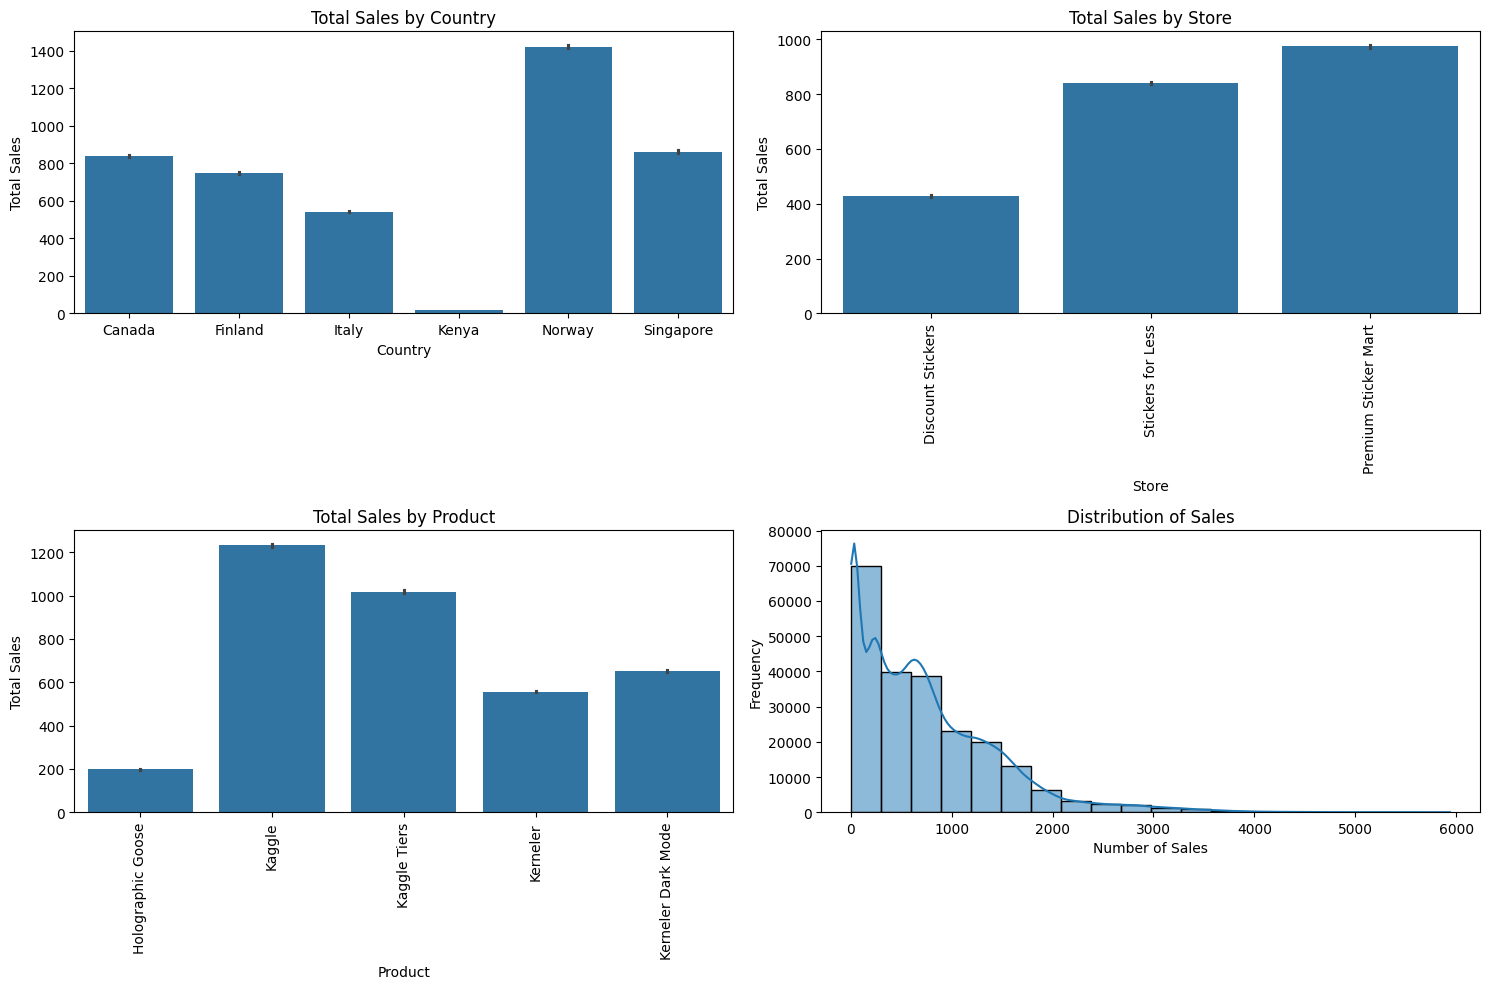

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Sales by Country
sns.barplot(x='country', y='num_sold', data=train_df, ax=axes[0, 0])
axes[0, 0].set_title('Total Sales by Country')
axes[0, 0].set_xlabel('Country')
axes[0, 0].set_ylabel('Total Sales')

# Sales by Store
sns.barplot(x='store', y='num_sold', data=train_df, ax=axes[0, 1])
axes[0, 1].set_title('Total Sales by Store')
axes[0, 1].set_xlabel('Store')
axes[0, 1].set_ylabel('Total Sales')
axes[0, 1].tick_params(axis='x', rotation=90)

# Sales by Product
sns.barplot(x='product', y='num_sold', data=train_df, ax=axes[1, 0])
axes[1, 0].set_title('Total Sales by Product')
axes[1, 0].set_xlabel('Product')
axes[1, 0].set_ylabel('Total Sales')
axes[1, 0].tick_params(axis='x', rotation=90)

# Distribution of Sales
sns.histplot(train_df['num_sold'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Sales')
axes[1, 1].set_xlabel('Number of Sales')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Check for patterns of missing sales

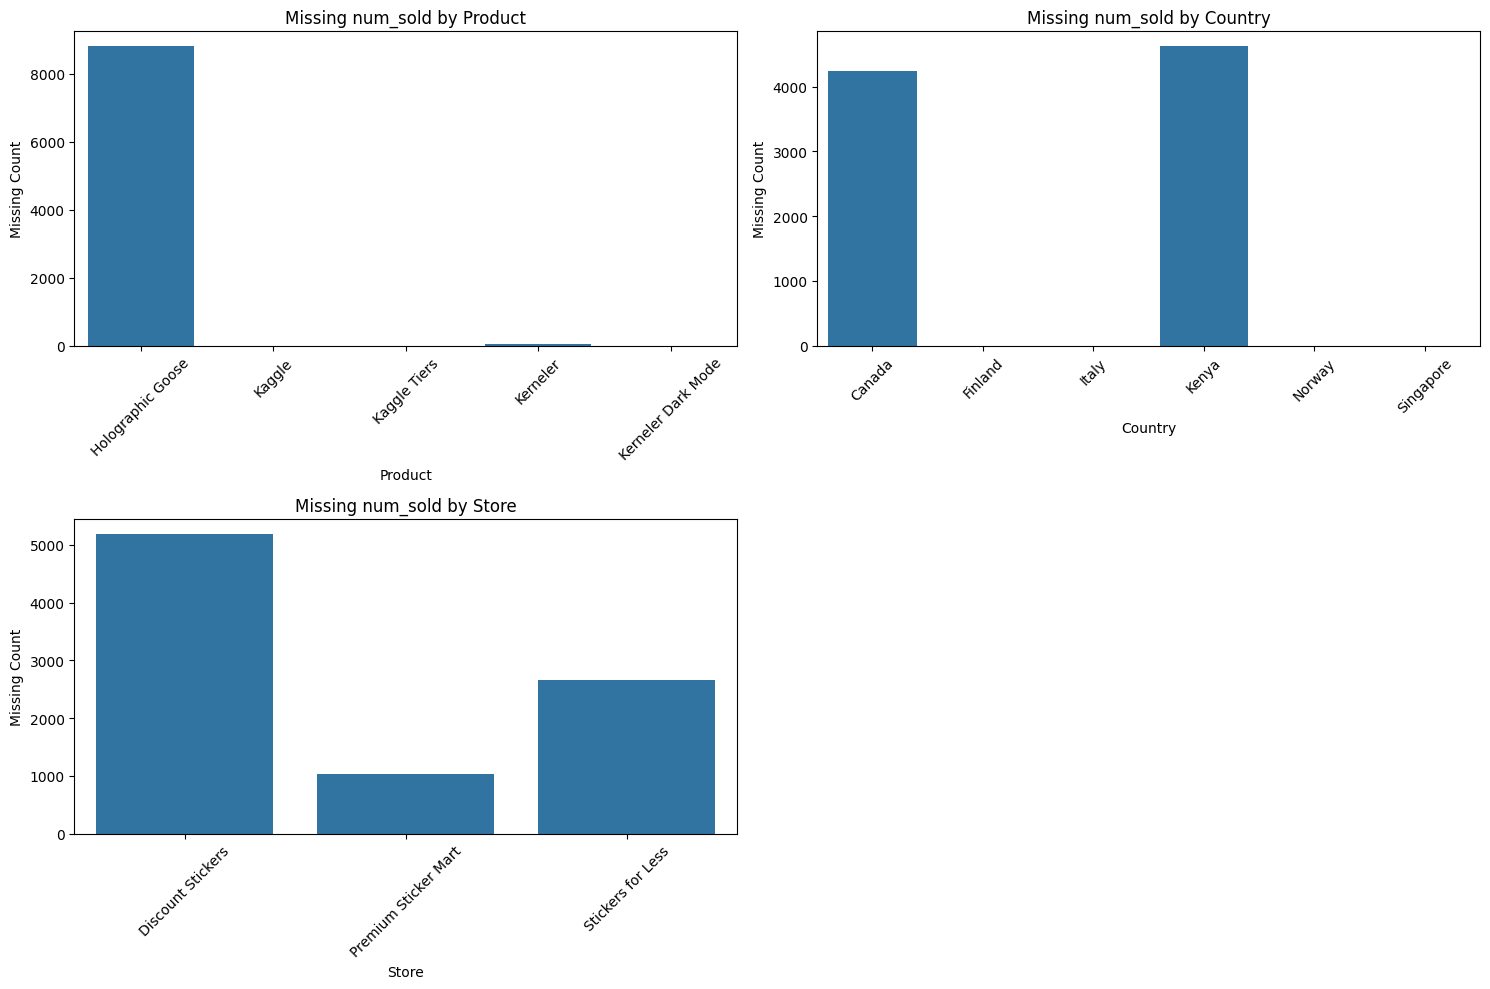

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Count missing values per product
missing_by_product = train_df.groupby('product')['num_sold'].apply(lambda x: x.isna().sum())
sns.barplot(x=missing_by_product.index, y=missing_by_product.values, ax=axes[0, 0])
axes[0, 0].set_title('Missing num_sold by Product')
axes[0, 0].set_xlabel('Product')
axes[0, 0].set_ylabel('Missing Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# Count missing values per country
missing_by_country = train_df.groupby('country')['num_sold'].apply(lambda x: x.isna().sum())
sns.barplot(x=missing_by_country.index, y=missing_by_country.values, ax=axes[0, 1])
axes[0, 1].set_title('Missing num_sold by Country')
axes[0, 1].set_xlabel('Country')
axes[0, 1].set_ylabel('Missing Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# Count missing values per store
missing_by_store = train_df.groupby('store')['num_sold'].apply(lambda x: x.isna().sum())
sns.barplot(x=missing_by_store.index, y=missing_by_store.values, ax=axes[1, 0])
axes[1, 0].set_title('Missing num_sold by Store')
axes[1, 0].set_xlabel('Store')
axes[1, 0].set_ylabel('Missing Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Hide the unused subplot (bottom-right corner)
axes[1, 1].axis('off')
plt.tight_layout()
plt.show()

In [28]:
# Group-Based Imputation - Since missing values are concentrated by groups
# Calculate the mean/median num_sold within these groups to fill missing values
train_df['num_sold'] = train_df.groupby(['product', 'store', 'country'])['num_sold'].transform(lambda x: x.fillna(x.mean()))

## Feature Engineering

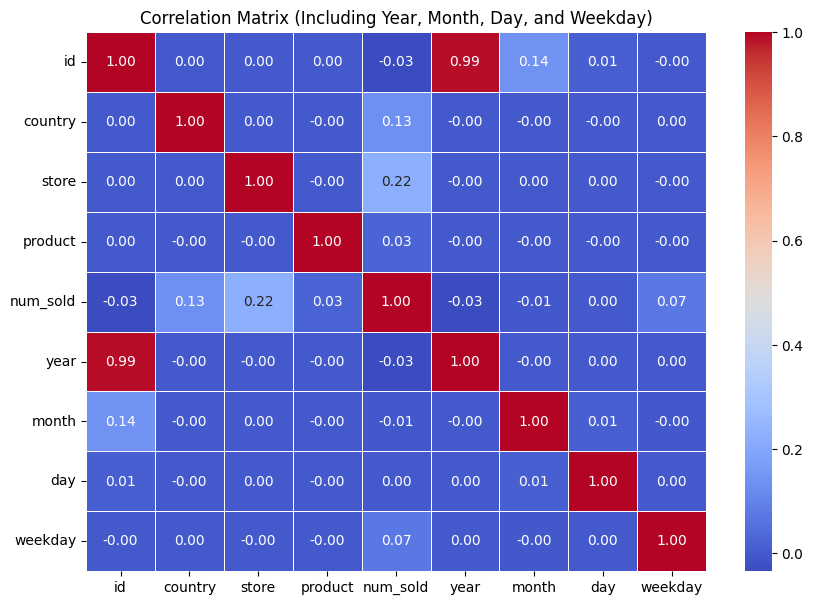

In [29]:
# Encode categorical cols
label_encoders = {}
categorical_columns = ['country', 'product', 'store']

for col in categorical_columns:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    label_encoders[col] = le

for col in categorical_columns:
    le = label_encoders[col]
    test_df[col] = le.transform(test_df[col])

# Convert the 'date' column to datetime and extract numeric features like year, month, day
train_df['date'] = pd.to_datetime(train_df['date'], errors='coerce')
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.day
train_df['weekday'] = pd.to_datetime(train_df['date']).dt.weekday

test_df['date'] = pd.to_datetime(test_df['date'], errors='coerce')
test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month
test_df['day'] = test_df['date'].dt.day
test_df['weekday'] = pd.to_datetime(test_df['date']).dt.weekday

train_df['year'] = train_df['year'].astype('int64')
train_df['month'] = train_df['month'].astype('int64')
train_df['day'] = train_df['day'].astype('int64')
train_df['weekday'] = train_df['weekday'].astype('int64')

test_df['year'] = test_df['year'].astype('int64')
test_df['month'] = test_df['month'].astype('int64')
test_df['day'] = test_df['day'].astype('int64')
test_df['weekday'] = test_df['weekday'].astype('int64')

# Correlation matrix
numeric_columns = train_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Including Year, Month, Day, and Weekday)")
plt.show()


## Feature Importance

In [30]:
from sklearn.preprocessing import LabelEncoder

train_df['store_country'] = train_df['store'].astype(str) + '_' + train_df['country'].astype(str)
train_df['store_product'] = train_df['store'].astype(str) + '_' + train_df['product'].astype(str)
train_df['product_country'] = train_df['product'].astype(str) + '_' + train_df['country'].astype(str)

test_df['store_country'] = test_df['store'].astype(str) + '_' + test_df['country'].astype(str)
test_df['store_product'] = test_df['store'].astype(str) + '_' + test_df['product'].astype(str)
test_df['product_country'] = test_df['product'].astype(str) + '_' + test_df['country'].astype(str)

le_store_country = LabelEncoder()
le_store_product = LabelEncoder()
le_product_country = LabelEncoder()

train_df['store_country'] = le_store_country.fit_transform(train_df['store_country'])
train_df['store_product'] = le_store_product.fit_transform(train_df['store_product'])

test_df['store_country'] = le_store_country.transform(test_df['store_country'])
test_df['store_product'] = le_store_product.transform(test_df['store_product'])

train_df['product_country'] = le_product_country.fit_transform(train_df['product_country'])
test_df['product_country'] = le_product_country.transform(test_df['product_country'])

           Feature  Importance
8    store_product    0.356334
0          country    0.329492
9  product_country    0.171709
2          product    0.056188
7    store_country    0.027041
3             year    0.024057
6          weekday    0.014482
4            month    0.013260
5              day    0.006089
1            store    0.001349


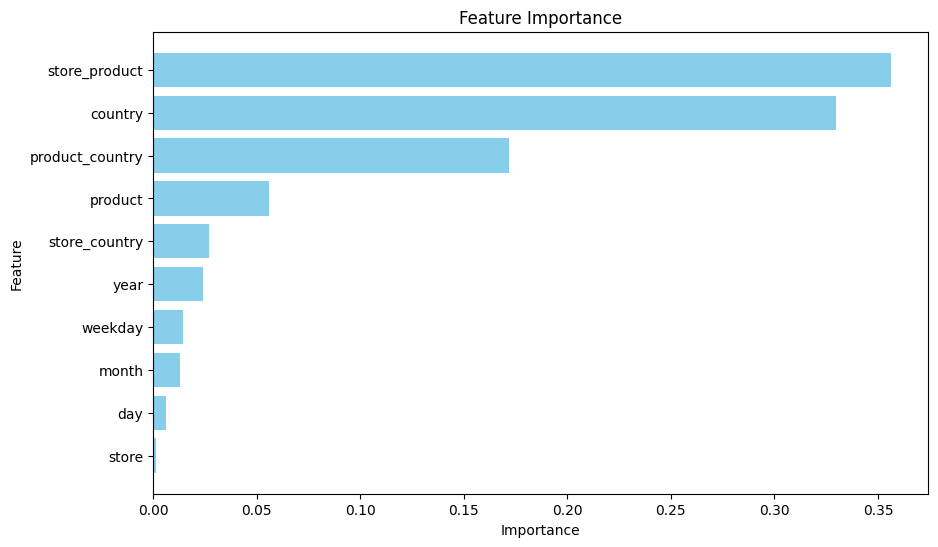

In [31]:
# Drop cols
train_df = train_df.dropna(subset=['num_sold'])
X = train_df.drop(columns=['num_sold', 'id', 'date'])
y = train_df['num_sold']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance.head(10))

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


## Insights
#### Interaction Features Matter:
##### The two interaction features (store_product and product_country) dominate the feature importance. This shows the value of creating combined features in this dataset.
#### Country-Level Influence:
##### The strong importance of country suggests that regional differences significantly impact sales.
#### Temporal Features Are Secondary:
##### While the year, month, and day-of-week features provide some predictive power, they are much less important compared to product and location features.

## Random Forest

In [32]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = train_df.drop(columns=['num_sold', 'id', 'date', 'store', 'day'])
y = train_df['num_sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Prepare test data and predict num_sold
X_test_final = test_df.drop(columns=['id', 'date', 'store', 'day'])
test_df['num_sold'] = model.predict(X_test_final)

submission = test_df[['id', 'num_sold']]
submission.to_csv("submission.csv", index=False)
print("Submission file created: submission.csv")


RMSE: 83.00
R² Score: 0.99
Submission file created: submission.csv


In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'min_samples_split': [2, 10],
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1  # Use all available CPU cores (wont run otherwise)
)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best RMSE: {np.sqrt(-grid_search.best_score_)}")


Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best RMSE: 76.55698241761584


In [11]:
# Cross-Validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated RMSE:", np.sqrt(-scores.mean()))


Cross-validated RMSE: 125.67497421558762


## XGBoost

In [12]:
from xgboost import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=6)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"XGBoost RMSE: {rmse:.2f}")
print(f"XGBoost R² Score: {r2:.2f}")


XGBoost RMSE: 80.03
XGBoost R² Score: 0.99


In [22]:
from xgboost import DMatrix, cv

# Convert train data to XGBoost's DMatrix format
dtrain = DMatrix(X, label=y)

params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42,
}

# 5-fold cross val
cv_results = cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=200,
    nfold=5,
    metrics='rmse',
    as_pandas=True,
    seed=42
)

print("Cross-validated RMSE:", cv_results['test-rmse-mean'].min())

Cross-validated RMSE: 74.00395358692508


In [25]:
from xgboost import DMatrix, train

# Convert the dataset into XGBoost's DMatrix format
dtrain = DMatrix(X, label=y)

# Define params for XGBoost
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 6,
    'n_estimators': 100
}

model = train(params, dtrain, num_boost_round=100)

dtest = DMatrix(X_test_final)

test_df['num_sold'] = model.predict(dtest)

submission = test_df[['id', 'num_sold']]
submission.to_csv("submission_xgb_native.csv", index=False)
print("Submission file created: submission_xgb_native.csv")


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [11:03:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Submission file created: submission_xgb_native.csv
